In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
import sys
from processing_siniestros import *

#paqueteria para ML
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EDAD                    81107 non-null  object
 1   COBERTURA               81107 non-null  object
 2   ENTIDAD                 81107 non-null  object
 3   CAUSA DEL SINIESTRO     81107 non-null  object
 4   PLAN DE LA POLIZA       81107 non-null  object
 5   MODALIDAD DE LA POLIZA  81107 non-null  object
 6   SEXO                    81107 non-null  object
 7   NUMERO DE SINIESTROS    81107 non-null  object
 8   MONTO RECLAMADO         81107 non-null  object
 9   VENCIMIENTOS            81107 non-null  object
 10  MONTO PAGADO            81107 non-null  object
 11  MONTO DE REASEGURO      81107 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB
None
EDAD                      0
COBERTURA                 0
ENTIDAD                   0
CAUSA DEL SINIESTRO       0
PLAN 

In [2]:
df = process_siniestros()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EDAD                    81107 non-null  object
 1   COBERTURA               81107 non-null  object
 2   ENTIDAD                 81107 non-null  object
 3   CAUSA DEL SINIESTRO     81107 non-null  object
 4   PLAN DE LA POLIZA       81107 non-null  object
 5   MODALIDAD DE LA POLIZA  81107 non-null  object
 6   SEXO                    81107 non-null  object
 7   NUMERO DE SINIESTROS    81107 non-null  object
 8   MONTO RECLAMADO         81107 non-null  object
 9   VENCIMIENTOS            81107 non-null  object
 10  MONTO PAGADO            81107 non-null  object
 11  MONTO DE REASEGURO      81107 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB
None
EDAD                      0
COBERTURA                 0
ENTIDAD                   0
CAUSA DEL SINIESTRO       0
PLAN 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EDAD                    81107 non-null  int64 
 1   COBERTURA               81107 non-null  object
 2   ENTIDAD                 81107 non-null  object
 3   CAUSA DEL SINIESTRO     81107 non-null  object
 4   PLAN DE LA POLIZA       81107 non-null  object
 5   MODALIDAD DE LA POLIZA  81107 non-null  object
 6   SEXO                    81107 non-null  object
 7   NUMERO DE SINIESTROS    81107 non-null  int64 
 8   MONTO RECLAMADO         81107 non-null  int64 
 9   VENCIMIENTOS            81107 non-null  int64 
 10  MONTO PAGADO            81107 non-null  int64 
 11  MONTO DE REASEGURO      81107 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 7.4+ MB


In [4]:
df

,EDAD,COBERTURA,ENTIDAD,CAUSA DEL SINIESTRO,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,SEXO,NUMERO DE SINIESTROS,MONTO RECLAMADO,VENCIMIENTOS,MONTO PAGADO,MONTO DE REASEGURO
0,61,Invalidez total y permanente,Baja California,(OSTEO)ARTROSIS PRIMARIA GENERALIZADA,Vitalicio,Flexible sin tasa garantizada,Femenino,1,1485501,0,1489939,0
1,46,Asistencias,Baja California,(OSTEO)ARTROSIS PRIMARIA GENERALIZADA,Vitalicio,Tradicional,Femenino,1,-5800,0,0,0
2,46,Fallecimiento,Baja California,(OSTEO)ARTROSIS PRIMARIA GENERALIZADA,Vitalicio,Tradicional,Femenino,1,-469892,0,0,0
3,46,Gastos funerarios,Baja California,(OSTEO)ARTROSIS PRIMARIA GENERALIZADA,Vitalicio,Tradicional,Femenino,1,-46546,0,0,0
4,64,Fallecimiento,Sonora,ABDOMEN AGUDO,Vitalicio,Flexible sin tasa garantizada,Femenino,1,495167,0,496646,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81102,26,Fallecimiento,Puebla,PRESENCIA DE OJO ARTIFICIAL,Dotal Mixto,Tradicional,Femenino,1,298422,0,296911,0
81103,48,Fallecimiento,Sonora,PRESENCIA DE OJO ARTIFICIAL,Dotal Mixto,Tradicional,Femenino,1,656460,0,674796,0
81104,50,Exención de pago de prima,Puebla,PRESENCIA DE OJO ARTIFICIAL,Temporal,Tradicional,Masculino,2,12955,0,12994,0
81105,53,Invalidez total y permanente,Tabasco,ESTADO DE DERIVACIÓN INTESTINAL O ANASTOMOSIS,Vitalicio,Flexible con tasa garantizada,Masculino,1,129652,0,130039,0


In [5]:
# Cambio completo de objetos a ints
df = df.apply(pd.to_numeric, downcast='integer', errors='ignore')

In [6]:
df[['NUMERO DE SINIESTROS', 'EDAD']] = df[['NUMERO DE SINIESTROS', 'EDAD']].astype('int32')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EDAD                    81107 non-null  int32 
 1   COBERTURA               81107 non-null  object
 2   ENTIDAD                 81107 non-null  object
 3   CAUSA DEL SINIESTRO     81107 non-null  object
 4   PLAN DE LA POLIZA       81107 non-null  object
 5   MODALIDAD DE LA POLIZA  81107 non-null  object
 6   SEXO                    81107 non-null  object
 7   NUMERO DE SINIESTROS    81107 non-null  int32 
 8   MONTO RECLAMADO         81107 non-null  int32 
 9   VENCIMIENTOS            81107 non-null  int32 
 10  MONTO PAGADO            81107 non-null  int32 
 11  MONTO DE REASEGURO      81107 non-null  int32 
dtypes: int32(6), object(6)
memory usage: 5.6+ MB


In [8]:
df['COBERTURA'], cat_COBERTURA = pd.factorize(df['COBERTURA'])
df['ENTIDAD'], cat_ENTIDAD = pd.factorize(df['ENTIDAD'])
df['CAUSA DEL SINIESTRO'], cat_CAUSA_SINIESTRO = pd.factorize(df['CAUSA DEL SINIESTRO'])
df['PLAN DE LA POLIZA'], cat_PLAN_POLIZA = pd.factorize(df['PLAN DE LA POLIZA'])
df['MODALIDAD DE LA POLIZA'], cat_MODALIDAD_POLIZA = pd.factorize(df['MODALIDAD DE LA POLIZA'])
df['SEXO'], cat_SEXO = pd.factorize(df['SEXO'])

In [9]:
print(cat_COBERTURA)
print(cat_ENTIDAD)
print(cat_CAUSA_SINIESTRO)
print(cat_PLAN_POLIZA)
print(cat_MODALIDAD_POLIZA)
print(cat_SEXO)

Index(['Invalidez total y permanente', 'Asistencias', 'Fallecimiento',
       'Gastos funerarios', 'Otros', 'Exención de pago de prima',
       'Enfermedades graves', 'Ahorro / inversión',
       'Muerte accidental (Doble indemnización)',
       'Muerte colectiva (Triple indemnización)', 'Sobrevivencia',
       'Devolución de prima', 'Desempleo/Incapacidad temporal',
       'Pérdidas Orgánicas', 'Dotales corto plazo'],
      dtype='object')
Index(['Baja California', 'Sonora', 'Nayarit', 'Ciudad de México', 'Colima',
       'Puebla', 'Jalisco', 'Sinaloa', 'Veracruz', 'Baja California Sur',
       'Nuevo Leon', 'Chiapas', 'Campeche', 'Zacatecas', 'Yucatán',
       'Aguascalientes', 'San Luis Potosí', 'Chihuahua', 'Guanajuato',
       'Oaxaca', 'Mexico', 'Guerrero', 'Tamaulipas', 'Querétaro', 'Morelos',
       'En el Extranjero', 'Coahuila', 'Michoacán', 'Tlaxcala', 'Hidalgo',
       'Tabasco', 'Durango', 'Quintana Roo', 'Sin domicilio fijo',
       'No aplica'],
      dtype='object')
Ind

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   EDAD                    81107 non-null  int32
 1   COBERTURA               81107 non-null  int64
 2   ENTIDAD                 81107 non-null  int64
 3   CAUSA DEL SINIESTRO     81107 non-null  int64
 4   PLAN DE LA POLIZA       81107 non-null  int64
 5   MODALIDAD DE LA POLIZA  81107 non-null  int64
 6   SEXO                    81107 non-null  int64
 7   NUMERO DE SINIESTROS    81107 non-null  int32
 8   MONTO RECLAMADO         81107 non-null  int32
 9   VENCIMIENTOS            81107 non-null  int32
 10  MONTO PAGADO            81107 non-null  int32
 11  MONTO DE REASEGURO      81107 non-null  int32
dtypes: int32(6), int64(6)
memory usage: 5.6 MB


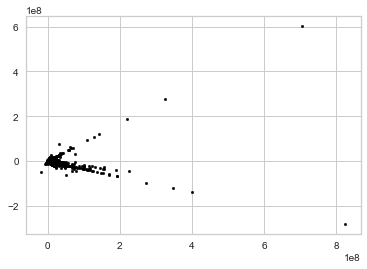

In [11]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xshort = pca.fit_transform(df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [12]:
rescaleX = StandardScaler().fit_transform(df)
Xescaled = pd.DataFrame(data = rescaleX, columns = df.columns)
Xescaled

,EDAD,COBERTURA,ENTIDAD,CAUSA DEL SINIESTRO,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,SEXO,NUMERO DE SINIESTROS,MONTO RECLAMADO,VENCIMIENTOS,MONTO PAGADO,MONTO DE REASEGURO
0,0.56,-1.26,-1.33,-1.64,-0.94,-0.87,-1.08,-0.09,0.37,-0.09,0.20,-0.03
1,-0.24,-0.97,-1.33,-1.64,-0.94,-0.19,-1.08,-0.09,-0.12,-0.09,-0.11,-0.03
2,-0.24,-0.68,-1.33,-1.64,-0.94,-0.19,-1.08,-0.09,-0.27,-0.09,-0.11,-0.03
3,-0.24,-0.39,-1.33,-1.64,-0.94,-0.19,-1.08,-0.09,-0.13,-0.09,-0.11,-0.03
4,0.72,-0.68,-1.22,-1.64,-0.94,-0.87,-1.08,-0.09,0.05,-0.09,-0.01,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
81102,-1.29,-0.68,-0.79,1.97,1.25,-0.19,-1.08,-0.09,-0.02,-0.09,-0.05,-0.03
81103,-0.13,-0.68,-1.22,1.97,1.25,-0.19,-1.08,-0.09,0.10,-0.09,0.03,-0.03
81104,-0.02,0.19,-0.79,1.97,0.15,-0.19,0.64,-0.03,-0.11,-0.09,-0.11,-0.03
81105,0.13,-1.26,1.89,1.97,-0.94,0.48,0.64,-0.09,-0.07,-0.09,-0.08,-0.03


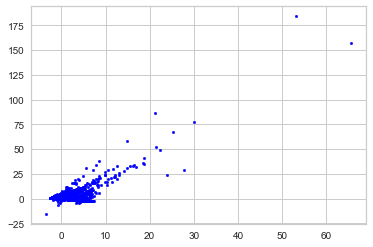

In [13]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xescaled_short = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short[:,0], Xescaled_short[:,1], c='blue', s=7)
plt.show()

In [14]:
#n_clusters: número de gruos a serem creados
#n_init: número de repeticiones del algoritmo
K = 3
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto 

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [15]:
kmeans_gral.cluster_centers_

array([[-1.39760773e+00,  3.95512509e-01,  1.16913094e-01,
         2.13245844e-01,  1.76034577e+00,  2.21774371e+00,
         1.04762045e+00,  6.62311634e-02, -6.59549012e-02,
         5.54177480e-02, -1.08289217e-02, -3.46855094e-02],
       [ 1.84127624e-01, -5.26462394e-02, -1.51442080e-02,
        -2.81489211e-02, -2.32047992e-01, -2.92316454e-01,
        -1.38029131e-01, -1.61091304e-02,  2.64177874e-04,
        -2.32121775e-02, -1.61522445e-02,  4.81624612e-03],
       [-6.26641953e-01,  1.05579203e+00, -3.68472667e-01,
         1.84970416e-01,  1.00339957e+00,  1.22254635e+00,
         4.86864697e-01,  1.20520730e+01,  1.36886922e+01,
         2.59325791e+01,  2.86183868e+01, -4.17098276e-01]])

In [16]:
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-1.41971564e+01,  1.90365860e+00],
       [-1.42877879e+01, -1.89962493e+00],
       [ 2.84849444e+01, -4.03367741e-03]])

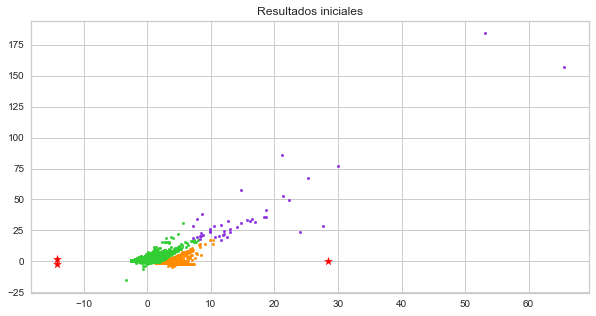

In [17]:
#vamos a visualizar los resultados

colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))

#graficamos los datos, cada uno con un color diferente representando un cluster
for i in range(K):
  points = np.array([Xescaled_short[j] for j in range (len(Xescaled_short)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])

#graficamos los centros de los clusters
ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados iniciales")
plt.show()

In [18]:
#n_clusters: número de gruos a ser creados
#n_init: número de repeticiones del algoritmo
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto 

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


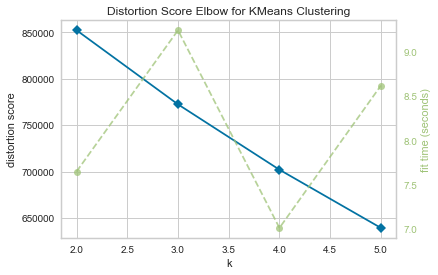

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#usar el metodo Elbow para determinar el mejor K

visualizer = KElbowVisualizer(kmeans_gral, k=(2,6))

visualizer.fit(Xescaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [20]:
sexo_data = df[['SEXO']]
kmeans_sexo = KMeans(n_clusters=5, random_state=0, n_init=50)
kmeans_sexo.fit(sexo_data)
sexo_labels = kmeans_sexo.labels_

/var/folders/wr/mv6w6lzj7qz936cjqy9_vrq40000gn/T/ipykernel_8834/3827958066.py:3: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans_sexo.fit(sexo_data)


In [21]:
df['CLUSTER_SEXO'] = sexo_labels

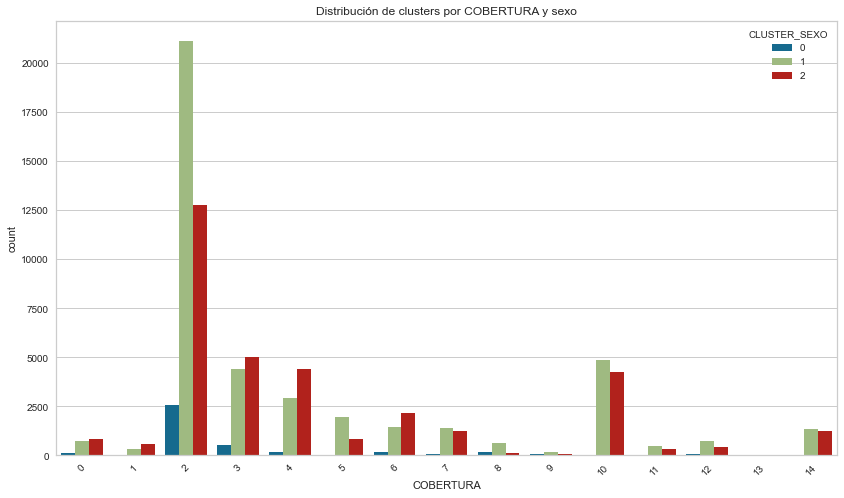

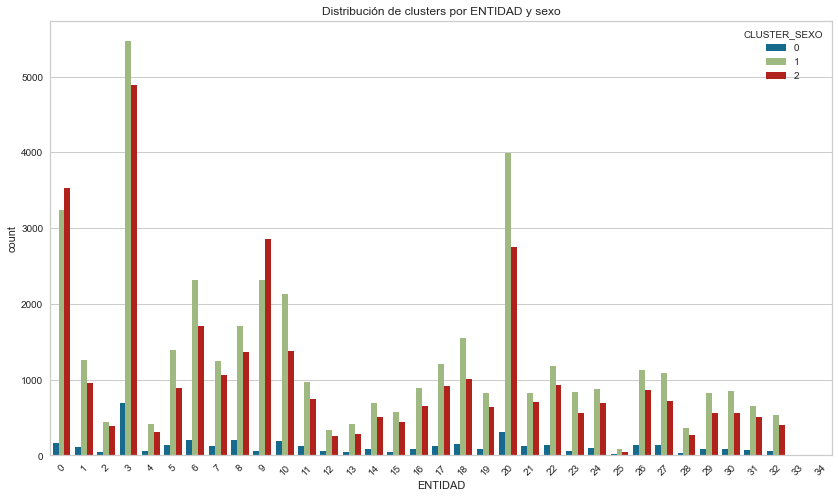

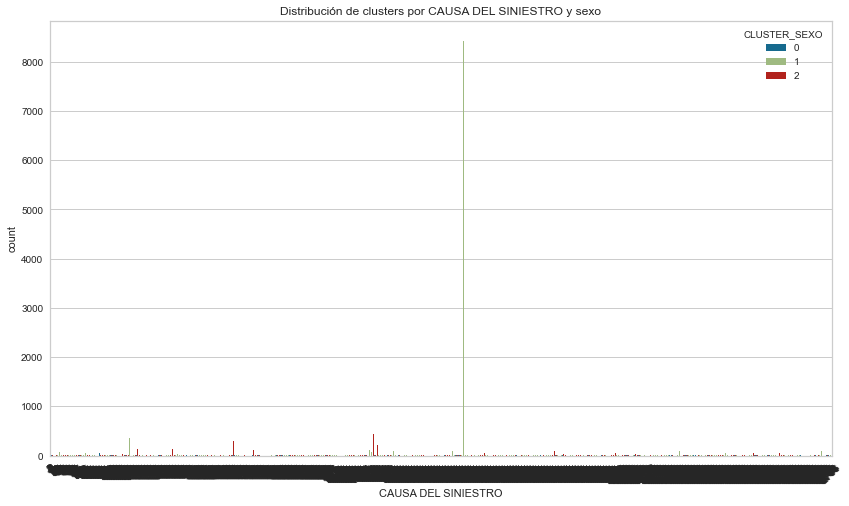

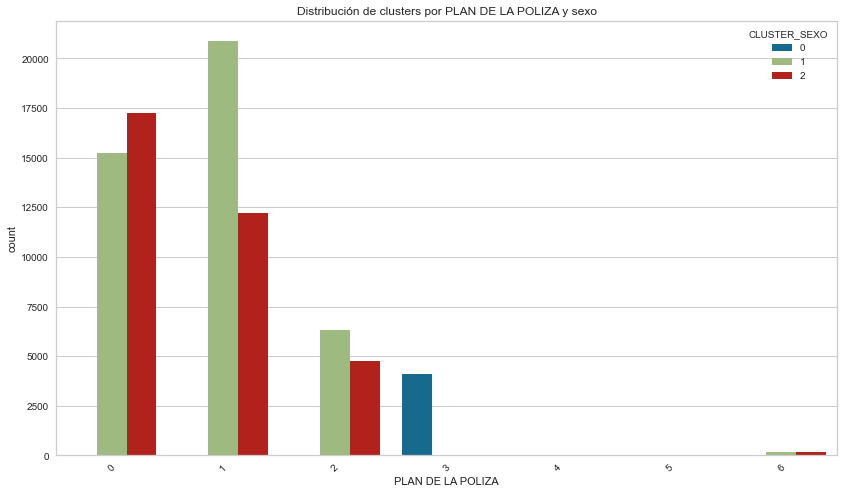

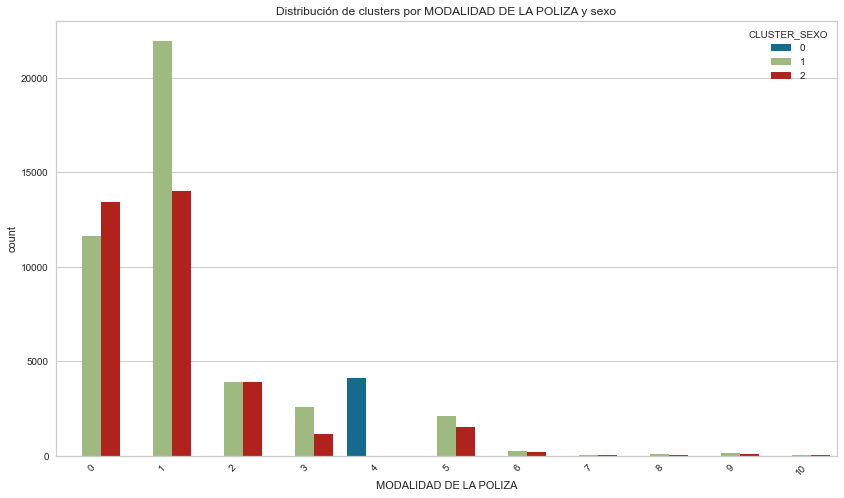

In [22]:
categorical_columns = ['COBERTURA', 'ENTIDAD', 'CAUSA DEL SINIESTRO', 'PLAN DE LA POLIZA', 'MODALIDAD DE LA POLIZA']

for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=column, hue='CLUSTER_SEXO', data=df)
    plt.title(f"Distribución de clusters por {column} y sexo")
    plt.xticks(rotation=45)
    plt.show()

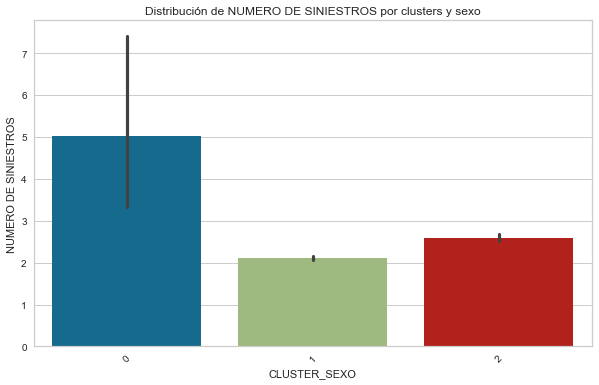

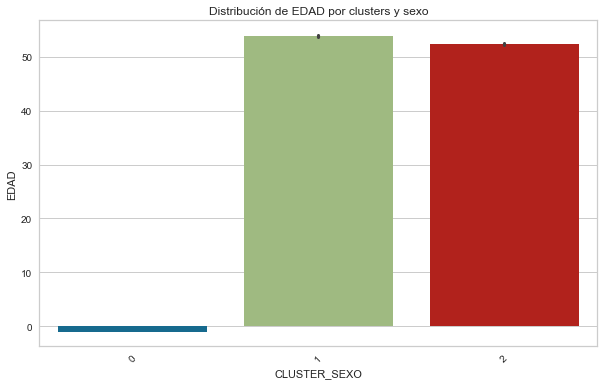

In [23]:
numeric_columns = ['NUMERO DE SINIESTROS', 'EDAD']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CLUSTER_SEXO', y=column, data=df)
    plt.title(f"Distribución de {column} por clusters y sexo")
    plt.xticks(rotation=45)
    plt.show()
